In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner as corner
from gwpopulation.utils import powerlaw
from gwpopulation.models.mass import two_component_single
import glob
import corner as corner
import os
import matplotlib.lines as mlines

/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [59]:
events = np.array(['GW150914_095045', 'GW151012_095443', 'GW151226_033853', 'GW170104_101158', 'GW170608_020116', 'GW170729_185629', 'GW170809_082821', 'GW170814_103043', 'GW170818_022509', 'GW170823_131358', 'GW190408_181802', 'GW190412_053044', 'GW190413_134308', 'GW190421_213856', 'GW190503_185404', 'GW190512_180714', 'GW190513_205428', 'GW190517_055101', 'GW190519_153544', 'GW190521_030229', 'GW190521_074359', 'GW190527_092055', 'GW190602_175927', 'GW190620_030421', 'GW190630_185205', 'GW190701_203306', 'GW190706_222641', 'GW190707_093326', 'GW190708_232457', 'GW190720_000836', 'GW190727_060333', 'GW190728_064510', 'GW190803_022701', 'GW190828_063405', 'GW190828_065509', 'GW190910_112807', 'GW190915_235702', 'GW190924_021846', 'GW190925_232845', 'GW190929_012149', 'GW190930_133541', 'GW191105_143521', 'GW191109_010717', 'GW191127_050227', 'GW191129_134029', 'GW191204_171526', 'GW191215_223052', 'GW191216_213338', 'GW191222_033537', 'GW191230_180458', 'GW200112_155838', 'GW200128_022011', 'GW200129_065458', 'GW200202_154313', 'GW200208_130117', 'GW200209_085452', 'GW200219_094415', 'GW200224_222234', 'GW200225_060421', 'GW200302_015811', 'GW200311_115853', 'GW200316_215756', 'GW190413_052954', 'GW190719_215514', 'GW190725_174728', 'GW190731_140936', 'GW190805_211137', 'GW191103_012549', 'GW200216_220804'])

In [76]:
f=open('O1O2O3_PLPP_fewevents_no190814_spinredshift/logs/population-collection-bbh.err')
lines=f.readlines()
events_used =lines[107][60:-2]

In [82]:
np.sort(events)==events_used.split(', ')

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [2]:
result_PL=h5py.File('O1O2O3_powerlawm2min_prod_fewerevents/result/bbh_mass_two_component_primary_mass_ratio_powerlaw_m2min_redshift_powerlaw_result.hdf5')
result_PL_no190814=h5py.File('O1O2O3_powerlawm2min_prod_fewerevents_no190814/result/bbh_mass_two_component_primary_mass_ratio_powerlaw_m2min_redshift_powerlaw_result.hdf5')

result_parabola=h5py.File('O1O2O3_parabolam2min_prod_condgammazeta_fewerevents/result/bbh_mass_parabola_m2min_allgammazeta_redshift_powerlaw_result.hdf5')
result_parabola_no190814=h5py.File('O1O2O3_parabolam2min_prod_condgammazeta_no190814/result/bbh_mass_parabola_m2min_allgammazeta_redshift_powerlaw_result.hdf5')

result_PLPP=h5py.File('O1O2O3_PLPP_fewevents/result/bbh_mass_two_component_primary_mass_ratio_redshift_powerlaw_result.hdf5')
result_PLPP_no190814=h5py.File('O1O2O3_PLPP_fewevents_no190814/result/bbh_mass_two_component_primary_mass_ratio_redshift_powerlaw_result.hdf5')

In [36]:
PL_result_dict = {'alpha':result_PL['posterior']['alpha'], 
                         'beta':result_PL['posterior']['beta'], 
                         'gamma':result_PL['posterior']['gamma'],
                         'mmin': result_PL['posterior']['mmin'], 
                         'mmax': result_PL['posterior']['mmax']}
PL_no190814_result_dict = {'alpha':result_PL_no190814['posterior']['alpha'], 
                         'beta':result_PL_no190814['posterior']['beta'], 
                         'gamma':result_PL_no190814['posterior']['gamma'],
                         'mmin': result_PL_no190814['posterior']['mmin'], 
                         'mmax': result_PL_no190814['posterior']['mmax']}
parabola_result_dict = {'alpha':result_parabola['posterior']['alpha'], 
                         'beta':result_parabola['posterior']['beta'], 
                         'gamma':result_parabola['posterior']['gamma'],
                         'zeta':result_parabola['posterior']['zeta'],
                         'mmin': result_parabola['posterior']['mmin'], 
                         'mmax': result_parabola['posterior']['mmax'],
                         'lam':result_parabola['posterior']['lam'],
                         'mpp':result_parabola['posterior']['mpp'],
                         'sigpp':result_parabola['posterior']['sigpp']}
parabola_no190814_result_dict = {'alpha':result_parabola_no190814['posterior']['alpha'], 
                         'beta':result_parabola_no190814['posterior']['beta'], 
                         'gamma':result_parabola_no190814['posterior']['gamma'],
                         'zeta':result_parabola_no190814['posterior']['zeta'],
                         'mmin': result_parabola_no190814['posterior']['mmin'], 
                         'mmax': result_parabola_no190814['posterior']['mmax'],
                         'lam':result_parabola['posterior']['lam'],
                         'mpp':result_parabola['posterior']['mpp'],
                         'sigpp':result_parabola['posterior']['sigpp']}
PLPP_result_dict = {'alpha':result_PLPP['posterior']['alpha'], 
                         'beta':result_PLPP['posterior']['beta'], 
                         'mmin': result_PLPP['posterior']['mmin'], 
                         'mmax': result_PLPP['posterior']['mmax']}
PLPP_no190814_result_dict = {'alpha':result_PLPP_no190814['posterior']['alpha'], 
                         'beta':result_PLPP_no190814['posterior']['beta'], 
                         'mmin': result_PLPP_no190814['posterior']['mmin'], 
                         'mmax': result_PLPP_no190814['posterior']['mmax']}

In [71]:
corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="darkslategrey",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=False,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\alpha$',r'$\beta$',r'$\gamma$', r'$m_{\rm max}$', r'$m_{\rm min}$'],
)

no190814corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="mediumseagreen",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=False,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=21),
    title_kwargs=dict(fontsize=16),
    labels=[r'$\alpha$',r'$\beta$',r'$\gamma$', r'$m_{\rm max}$', r'$m_{\rm min}$'],
)

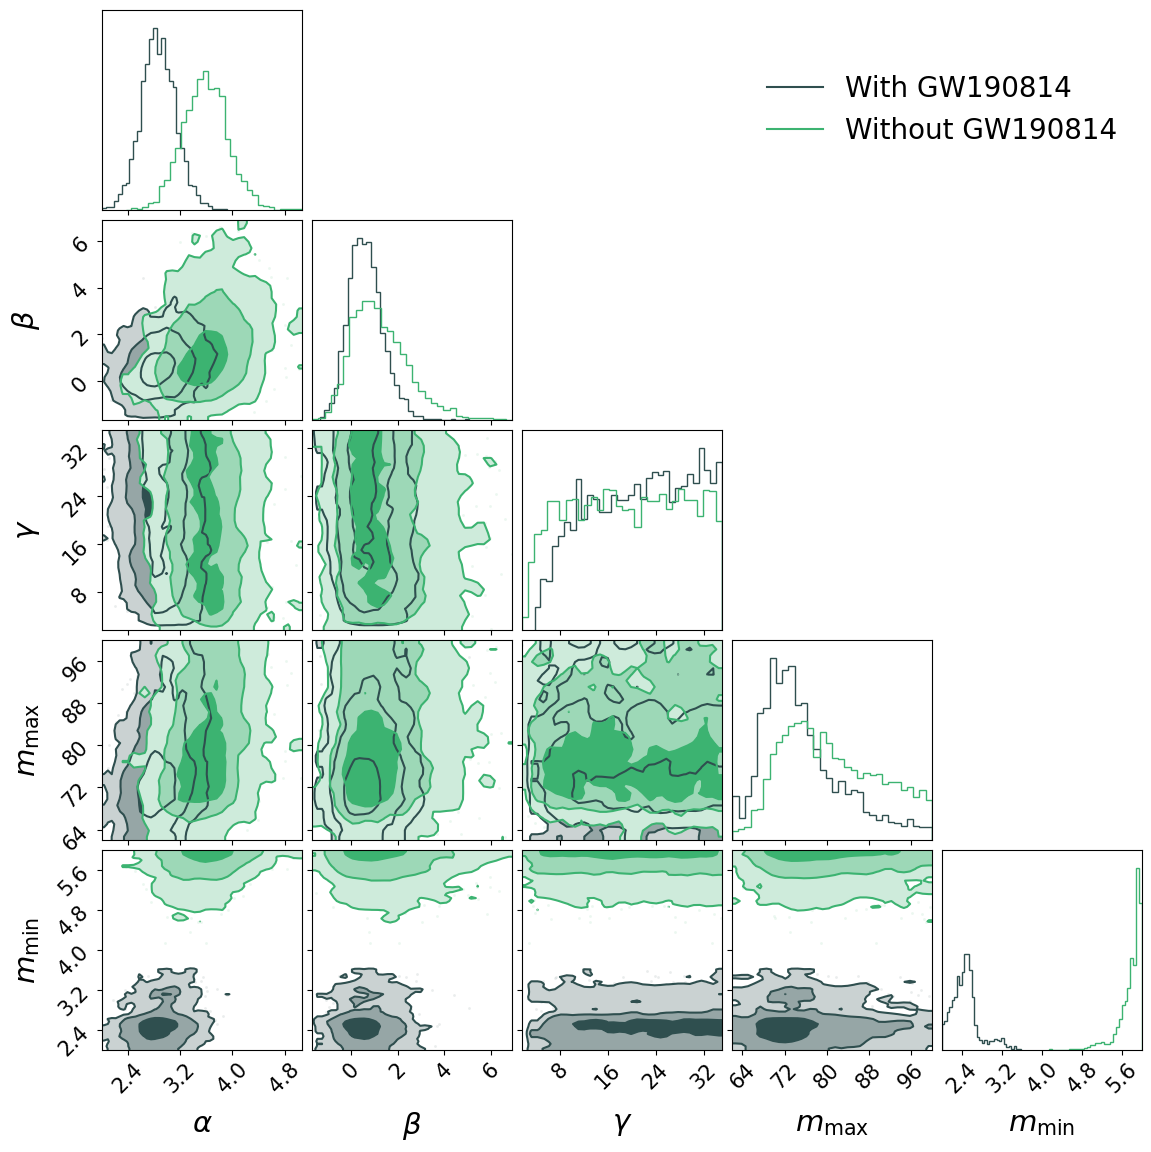

In [72]:
plt.rcParams.update({'font.size': 15})
colors=['darkslategrey', 'mediumseagreen']
labels=['With GW190814', 'Without GW190814']
fig = corner.corner(PL_result_dict,  **corner_kwargs)
corner.corner(PL_no190814_result_dict, fig=fig, **no190814corner_kwargs)
plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=labels[i])
            for i in range(2)
        ],
        fontsize=20, frameon=False,
        bbox_to_anchor=(1, 5), loc="upper right"
    )
plt.savefig('paper_plots/PL_corner.pdf')

In [64]:
corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="darkslateblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=False,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=18),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\alpha$',r'$\beta$',r'$\gamma$', r'$m_{\rm max}$', r'$m_{\rm min}$', r'$\zeta$'],
)

no190814corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="mediumorchid",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=False,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=21),
    title_kwargs=dict(fontsize=16),
    labels=[r'$\alpha$',r'$\beta$',r'$\gamma$', r'$m_{\rm max}$', r'$m_{\rm min}$', r'$\zeta$'],
)

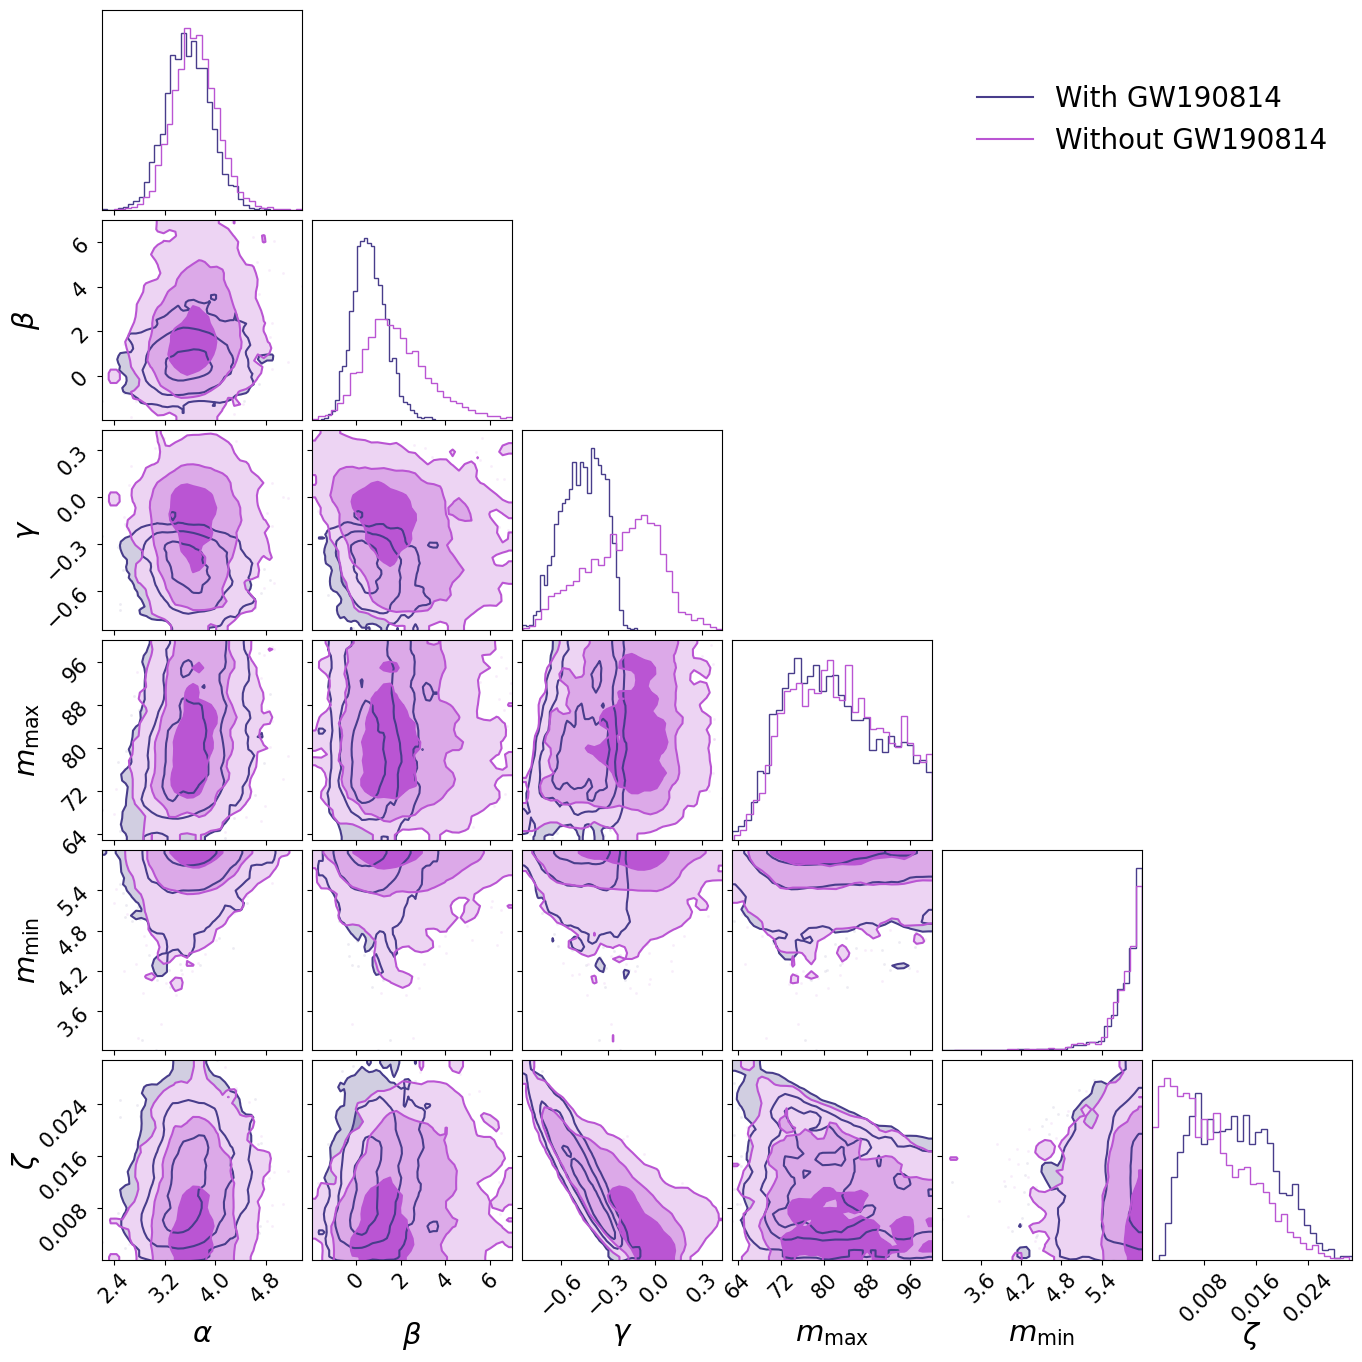

In [65]:
plt.rcParams.update({'font.size': 15})
colors=['darkslateblue', 'mediumorchid']
labels=['With GW190814', 'Without GW190814']
fig = corner.corner(parabola_result_dict, **corner_kwargs)
corner.corner(parabola_no190814_result_dict, fig=fig, **no190814corner_kwargs)
plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=labels[i])
            for i in range(2)
        ],
        fontsize=20, frameon=False,
        bbox_to_anchor=(1, 6), loc="upper right"
    )
plt.savefig('paper_plots/parabola_corner.pdf', rasterize=True)

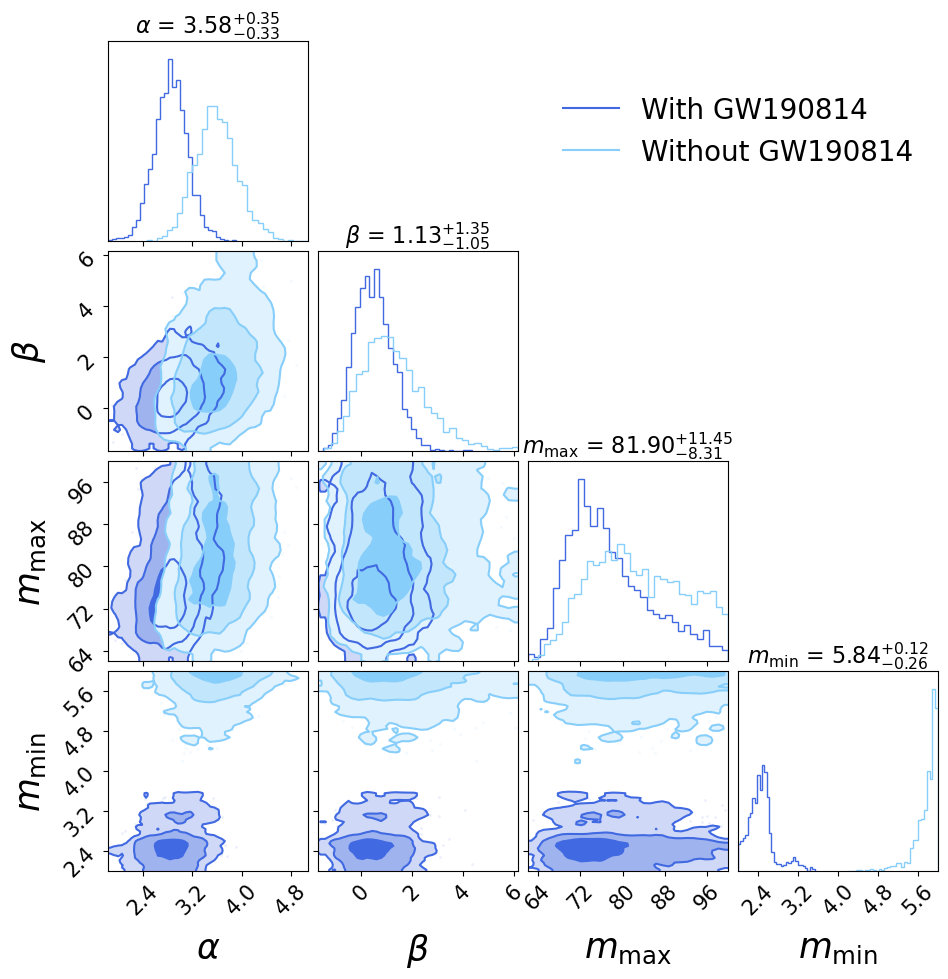

In [62]:
plt.rcParams.update({'font.size': 15})
colors=['royalblue', 'lightskyblue']
labels=['With GW190814', 'Without GW190814']
corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color=colors[0],
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=False,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\alpha$',r'$\beta$', r'$m_{\rm max}$', r'$m_{\rm min}$'],
)

no190814corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color=colors[1],
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=16),
    labels=[r'$\alpha$',r'$\beta$', r'$m_{\rm max}$', r'$m_{\rm min}$'],
)
fig = corner.corner(PLPP_result_dict,  **corner_kwargs)
corner.corner(PLPP_no190814_result_dict, fig=fig, **no190814corner_kwargs)
plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=labels[i])
            for i in range(2)
        ],
        fontsize=20, frameon=False,
        bbox_to_anchor=(1, 4), loc="upper right"
    )

In [4]:
def PL_m2min_m1(mass1, mmax, mmin, gamma):
    m2min = (mmax-mmin)*(((mass1-mmin)/(mmax-mmin))**gamma)+mmin
    m2min[m2min>mmax]=np.nan
    return m2min
    
def parabola_m2min_m1(mass1, mmax, mmin, gamma, zeta):
    m2min = mmin + gamma*(mass1 - mmin) + zeta * (mass1 - mmin)**2
    m2min[m2min>mmax]=np.nan
    return m2min


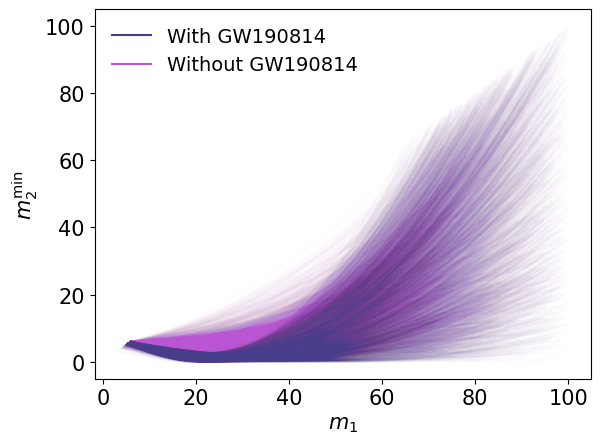

In [9]:
colors=['darkslateblue', 'mediumorchid']
labels=['With GW190814', 'Without GW190814']
plt.rcParams.update({'font.size': 15})

for i in range(len(parabola_no190814_result_dict['mmin'])):
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    mass1_parabola_no190814 = np.linspace(parabola_no190814_result_dict['mmin'][i], parabola_no190814_result_dict['mmax'][i],1000)
    m2min_parabola_no190814 = parabola_m2min_m1(mass1_parabola_no190814, parabola_no190814_result_dict['mmax'][i], parabola_no190814_result_dict['mmin'][i],\
                     parabola_no190814_result_dict['gamma'][i], parabola_no190814_result_dict['zeta'][i])
    plt.plot(mass1_parabola, m2min_parabola, color=colors[0], alpha=0.01, rasterized=True)
    plt.plot(mass1_parabola_no190814, m2min_parabola_no190814, color=colors[1], alpha=0.01, rasterized=True)

plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=labels[i])
            for i in range(2)
        ],
        fontsize=14, frameon=False,
        bbox_to_anchor=(0, 1), loc="upper left"
    )
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')
plt.savefig('paper_plots/parabola_modellines.pdf')

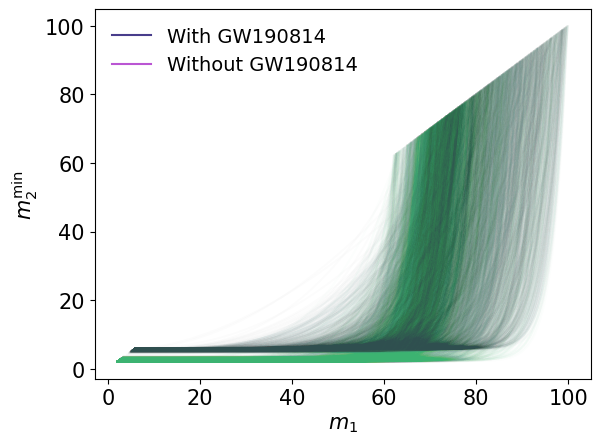

In [10]:
for i in range(len((PL_result_dict['mmin']))):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    mass1_PL_no190814 = np.linspace(PL_no190814_result_dict['mmin'][i], PL_no190814_result_dict['mmax'][i],1000)
    m2min_PL_no190814 = PL_m2min_m1(mass1_PL_no190814, PL_no190814_result_dict['mmax'][i], PL_no190814_result_dict['mmin'][i],\
                     PL_no190814_result_dict['gamma'][i])
    plt.plot(mass1_PL, m2min_PL, color='mediumseagreen', alpha=0.01)
    plt.plot(mass1_PL_no190814, m2min_PL_no190814, color='darkslategrey', alpha=0.01)

plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=labels[i])
            for i in range(2)
        ],
        fontsize=14, frameon=False,
        bbox_to_anchor=(0, 1), loc="upper left"
    )
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')
plt.savefig('paper_plots/PL_modellines.pdf')

In [5]:
mass1_arry = np.linspace(2., 100.,1000)
m2min_parabola = [parabola_m2min_m1(mass1_arry, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i]) for i in range(len(parabola_result_dict['mmax']))]
m2min_parabola_no190814 = [parabola_m2min_m1(mass1_arry, parabola_no190814_result_dict['mmax'][i], parabola_no190814_result_dict['mmin'][i],\
                     parabola_no190814_result_dict['gamma'][i], parabola_no190814_result_dict['zeta'][i]) for i in range(len(parabola_no190814_result_dict['mmax']))]

Text(0.5, 0, '$m_2^{\\rm min} ~/ \\mathrm{M}_{\\odot}$')

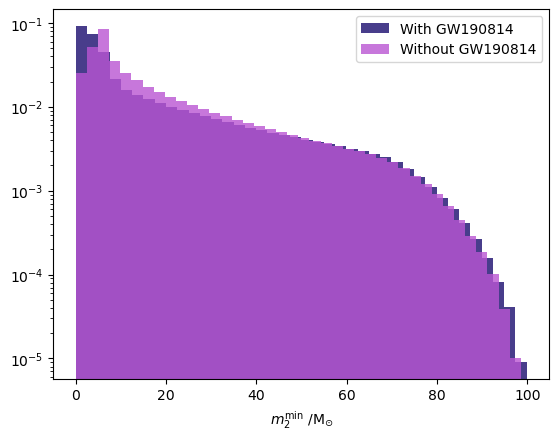

In [33]:
plt.hist(np.array(m2min_parabola).flatten(), bins=40, color='darkslateblue',\
         label='With GW190814', density=True)
plt.hist(np.array(m2min_parabola_no190814).flatten(), bins=40, color='mediumorchid',\
         label='Without GW190814', density=True, alpha=0.8)
plt.legend()
plt.yscale('log')
plt.xlabel(r'$m_2^{\rm min} ~/ \mathrm{M}_{\odot}$')

In [41]:
m2min_parabola_m1_10 = [parabola_m2min_m1([10.], parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i]) for i in range(len(parabola_result_dict['mmax']))]
m2min_parabola_no190814_m1_10 = [parabola_m2min_m1([10.], parabola_no190814_result_dict['mmax'][i], parabola_no190814_result_dict['mmin'][i],\
                     parabola_no190814_result_dict['gamma'][i], parabola_no190814_result_dict['zeta'][i]) for i in range(len(parabola_no190814_result_dict['mmax']))]
m2min_parabola_m1_20 = [parabola_m2min_m1([20.], parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i]) for i in range(len(parabola_result_dict['mmax']))]
m2min_parabola_no190814_m1_20 = [parabola_m2min_m1([20.], parabola_no190814_result_dict['mmax'][i], parabola_no190814_result_dict['mmin'][i],\
                     parabola_no190814_result_dict['gamma'][i], parabola_no190814_result_dict['zeta'][i]) for i in range(len(parabola_no190814_result_dict['mmax']))]

Text(0.5, 0, '$m_2^{\\rm min} ~/ \\mathrm{M}_{\\odot}$ at $m_1=10M_{\\odot}$')

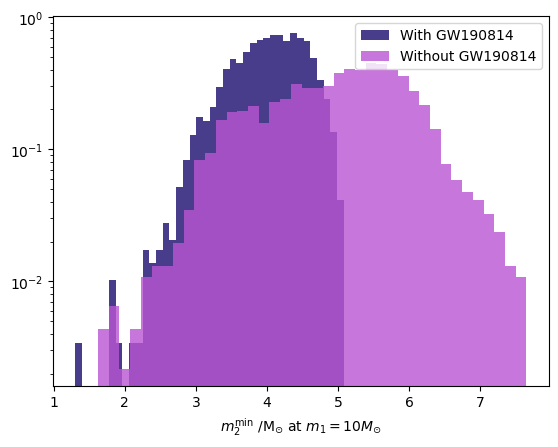

In [84]:
plt.hist(np.array(m2min_parabola_m1_10).flatten(), bins=40, color='darkslateblue',\
         label='With GW190814', density=True)
plt.hist(np.array(m2min_parabola_no190814_m1_10).flatten(), bins=40, color='mediumorchid',\
         label='Without GW190814', density=True, alpha=0.8)
plt.legend()
plt.yscale('log')
plt.xlabel(r'$m_2^{\rm min} ~/ \mathrm{M}_{\odot}$ at $m_1=10M_{\odot}$')

Text(0.5, 0, '$m_2^{\\rm min} ~/ \\mathrm{M}_{\\odot}$ at $m_1=20M_{\\odot}$')

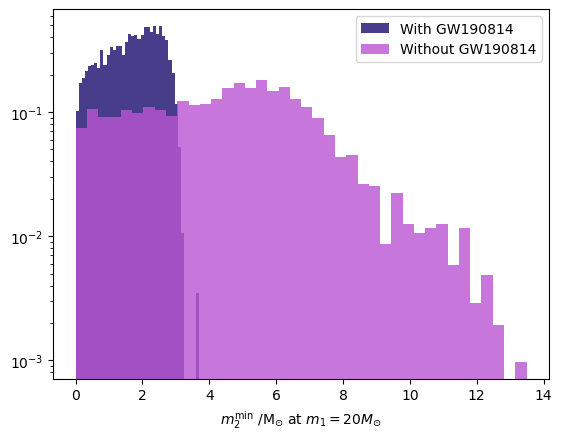

In [85]:
plt.hist(np.array(m2min_parabola_m1_20).flatten(), bins=40, color='darkslateblue',\
         label='With GW190814', density=True)
plt.hist(np.array(m2min_parabola_no190814_m1_20).flatten(), bins=40, color='mediumorchid',\
         label='Without GW190814', density=True, alpha=0.8)
plt.legend()
plt.yscale('log')
plt.xlabel(r'$m_2^{\rm min} ~/ \mathrm{M}_{\odot}$ at $m_1=20M_{\odot}$')

In [38]:
m1_slices = [10.,20.,40.]
p_m1 = np.zeros((len(parabola_result_dict['alpha']),3))
p_m1_no190814 = np.zeros((len(parabola_no190814_result_dict['alpha']),3))
for m1_idx, m1 in enumerate(m1_slices):
    p_m1[:, m1_idx] = np.array([two_component_single(m1, parabola_result_dict['alpha'][i], parabola_result_dict['mmin'][i],\
                                     parabola_result_dict['mmax'][i], parabola_result_dict['lam'][i],\
                                     parabola_result_dict['mpp'][i], parabola_result_dict['sigpp'][i]) for i in range(len(parabola_result_dict['alpha']))])
    p_m1_no190814[:, m1_idx] = np.array([two_component_single(m1, parabola_no190814_result_dict['alpha'][i], parabola_no190814_result_dict['mmin'][i],\
                                     parabola_no190814_result_dict['mmax'][i], parabola_no190814_result_dict['lam'][i],\
                                     parabola_no190814_result_dict['mpp'][i], parabola_no190814_result_dict['sigpp'][i]) for i in range(len(parabola_no190814_result_dict['alpha']))])

In [42]:
Nq=100
from tqdm import tqdm
p_q = np.zeros((len(parabola_result_dict['alpha']), Nq, 3))
p_q_no190814 = np.zeros((len(parabola_no190814_result_dict['alpha']), Nq, 3))

for m1_idx, m1 in enumerate(m1_slices):
    m2min_parabola = [parabola_m2min_m1(np.array([m1]), parabola_result_dict['mmax'][j], parabola_result_dict['mmin'][j],\
                 parabola_result_dict['gamma'][j], parabola_result_dict['zeta'][j]) for j in range(len(parabola_result_dict['mmax']))]
    m2min_parabola_no190814 = [parabola_m2min_m1(np.array([m1]), parabola_no190814_result_dict['mmax'][j], parabola_no190814_result_dict['mmin'][j],\
                 parabola_no190814_result_dict['gamma'][j], parabola_no190814_result_dict['zeta'][j]) for j in range(len(parabola_no190814_result_dict['mmax']))]
    
    for i in tqdm(range(len(parabola_result_dict['alpha']))):
        p_q[i,:,m1_idx] = powerlaw(np.linspace(0,1,Nq), parabola_result_dict['beta'][i], 1,\
                                   np.array(m2min_parabola)[i] / m1_slices[m1_idx])
    
    for i in tqdm(range(len(parabola_no190814_result_dict['alpha']))):
        p_q_no190814[i,:,m1_idx] = powerlaw(np.linspace(0,1,Nq), parabola_no190814_result_dict['beta'][i], 1,\
                                   np.array(m2min_parabola_no190814)[i] / m1_slices[m1_idx])


100%|██████████| 3068/3068 [00:04<00:00, 705.18it/s]


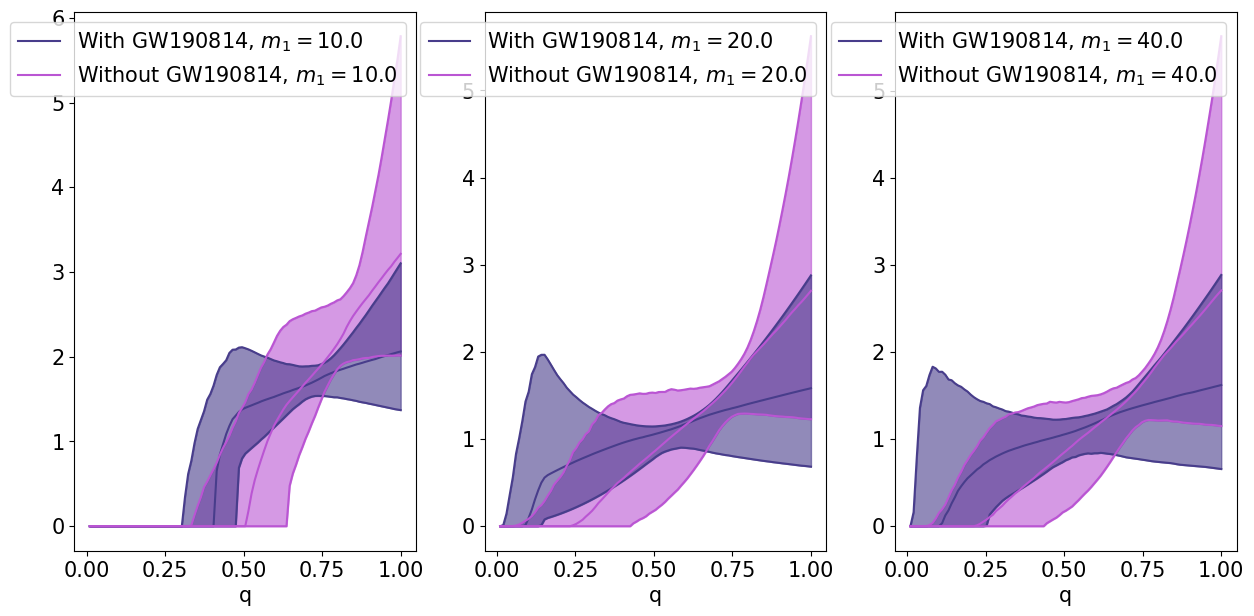

In [49]:
plt.rcParams["figure.figsize"] = (15,7)

fig,ax = plt.subplots(1,3)
for i in range(3):
    ax[i].plot(np.linspace(0,1,Nq), np.median(p_q, axis=0)[:,i], color='darkslateblue',\
             label=rf'With GW190814, $m_1={m1_slices[i]}$')
    ax[i].plot(np.linspace(0,1,Nq), np.percentile(p_q, q=95, axis=0)[:,i], color='darkslateblue')
    ax[i].plot(np.linspace(0,1,Nq), np.percentile(p_q, q=5, axis=0)[:,i], color='darkslateblue')
    ax[i].plot(np.linspace(0,1,Nq), np.median(p_q_no190814, axis=0)[:,i], color='mediumorchid',\
             label=rf'Without GW190814, $m_1={m1_slices[i]}$')
    ax[i].plot(np.linspace(0,1,Nq), np.percentile(p_q_no190814, q=95, axis=0)[:,i], color='mediumorchid')
    ax[i].plot(np.linspace(0,1,Nq), np.percentile(p_q_no190814, q=5, axis=0)[:,i], color='mediumorchid')
    ax[i].set_xlabel('q')
    ax[i].fill_between(np.linspace(0,1,Nq), np.percentile(p_q_no190814, q=5, axis=0)[:,i]\
                 ,np.percentile(p_q_no190814, q=95, axis=0)[:,i], color='mediumorchid', alpha=0.6)
    ax[i].fill_between(np.linspace(0,1,Nq), np.percentile(p_q, q=5, axis=0)[:,i]\
                 ,np.percentile(p_q, q=95, axis=0)[:,i], color='darkslateblue', alpha=0.6)
    ax[i].legend()
#plt.yscale('log')
#plt.xlabel(r'$m_2 ~/ \mathrm{M}_{\odot}$ at $m_1=10M_{\odot}$')

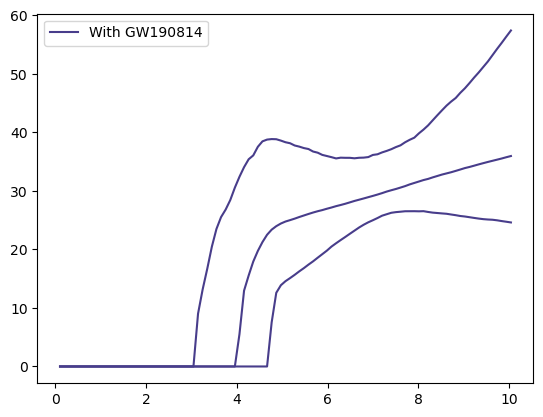

In [50]:
p_m2 = p_q/p_m1[:, np.newaxis]    
plt.plot(np.linspace(0,1,Nq)*mass1_arry[82], np.median(p_m2, axis=0), color='darkslateblue',\
         label='With GW190814')
plt.plot(np.linspace(0,1,Nq)*mass1_arry[82], np.percentile(p_m2, q=95, axis=0), color='darkslateblue')
plt.plot(np.linspace(0,1,Nq)*mass1_arry[82], np.percentile(p_m2, q=5, axis=0), color='darkslateblue')
plt.legend()

Text(0, 0.5, '$m_2^{\\rm min} ~/ \\mathrm{M}_{\\odot}$')

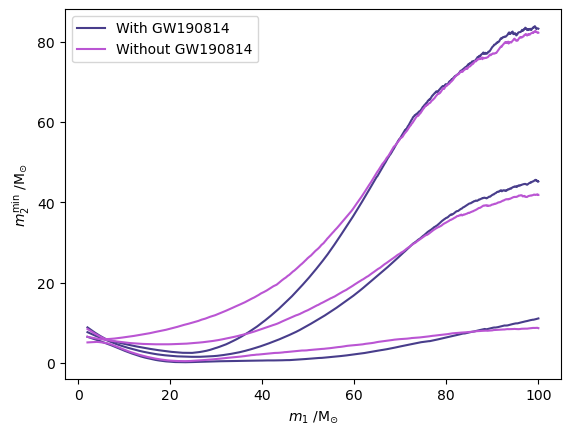

In [16]:
plt.plot(mass1_arry,np.nanpercentile(m2min_parabola, q=5, axis=0), color='darkslateblue')
plt.plot(mass1_arry,np.nanpercentile(m2min_parabola, q=95, axis=0), color='darkslateblue')
plt.plot(mass1_arry,np.nanmedian(m2min_parabola, axis=0), color='darkslateblue', label='With GW190814')

plt.plot(mass1_arry,np.nanpercentile(m2min_parabola_no190814, q=5, axis=0), color='mediumorchid')
plt.plot(mass1_arry,np.nanpercentile(m2min_parabola_no190814, q=95, axis=0), color='mediumorchid')
plt.plot(mass1_arry,np.nanmedian(m2min_parabola_no190814, axis=0), color='mediumorchid', label='Without GW190814')

plt.legend()
plt.xlabel(r'$m_1 ~/ \mathrm{M}_{\odot}$')
plt.ylabel(r'$m_2^{\rm min} ~/ \mathrm{M}_{\odot}$')

In [74]:
mass1_arry = np.linspace(2., 100.,1000)
m2min_PL = [PL_m2min_m1(mass1_array, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i]) for i in range(len(PL_result_dict['mmax']))]
m2min_PL_no190814 = [PL_m2min_m1(mass1_array, PL_no190814_result_dict['mmax'][i], PL_no190814_result_dict['mmin'][i],\
                     PL_no190814_result_dict['gamma'][i]) for i in range(len(PL_no190814_result_dict['mmax']))]

/tmp/ipykernel_2862982/133766630.py:2: RuntimeWarning: invalid value encountered in power
  m2min = (mmax-mmin)*(((mass1-mmin)/(mmax-mmin))**gamma)+mmin


Text(0.5, 0, '$m_2^{\\rm min} ~/ \\mathrm{M}_{\\odot}$')

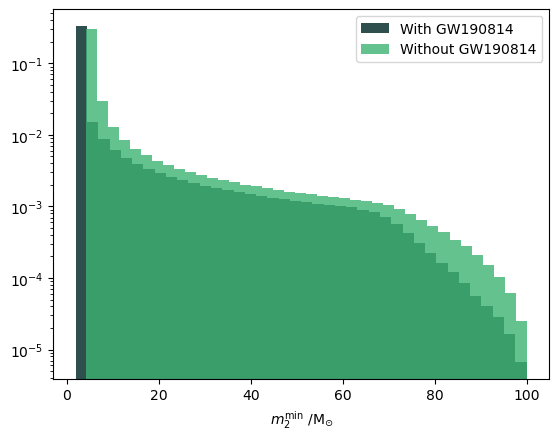

In [34]:
plt.hist(np.array(m2min_PL).flatten(), bins=40, color='darkslategrey',\
         label='With GW190814', density=True)
plt.hist(np.array(m2min_PL_no190814).flatten(), bins=40, color='mediumseagreen',\
         label='Without GW190814', density=True, alpha=0.8)
plt.legend()
plt.yscale('log')
plt.xlabel(r'$m_2^{\rm min} ~/ \mathrm{M}_{\odot}$')

Text(0, 0.5, '$m_2^{\\rm min} ~/ \\mathrm{M}_{\\odot}$')

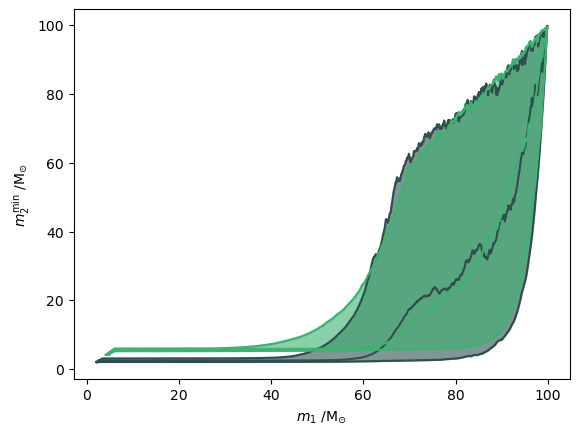

In [78]:
plt.plot(mass1_array,np.nanpercentile(m2min_PL,q=5,axis=0), color='darkslategrey')
plt.plot(mass1_array,np.nanpercentile(m2min_PL,q=95,axis=0), color='darkslategrey')
plt.plot(mass1_array,np.nanpercentile(m2min_PL,q=50,axis=0), color='darkslategrey')
plt.fill_between(mass1_array, np.nanpercentile(m2min_PL, q=5, axis=0)\
                 ,np.nanpercentile(m2min_PL, q=95, axis=0), color='darkslategrey', alpha=0.6)

plt.plot(mass1_array,np.nanpercentile(m2min_PL_no190814,q=5,axis=0), color='mediumseagreen')
plt.plot(mass1_array,np.nanpercentile(m2min_PL_no190814,q=95,axis=0), color='mediumseagreen')
plt.plot(mass1_array,np.nanpercentile(m2min_PL_no190814,q=50,axis=0), color='mediumseagreen')
plt.fill_between(mass1_array, np.nanpercentile(m2min_PL_no190814, q=5, axis=0)\
                 ,np.nanpercentile(m2min_PL_no190814, q=95, axis=0), color='mediumseagreen', alpha=0.6)

plt.xlabel(r'$m_1 ~/ \mathrm{M}_{\odot}$')
plt.ylabel(r'$m_2^{\rm min} ~/ \mathrm{M}_{\odot}$')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$q_{\\rm min}$')

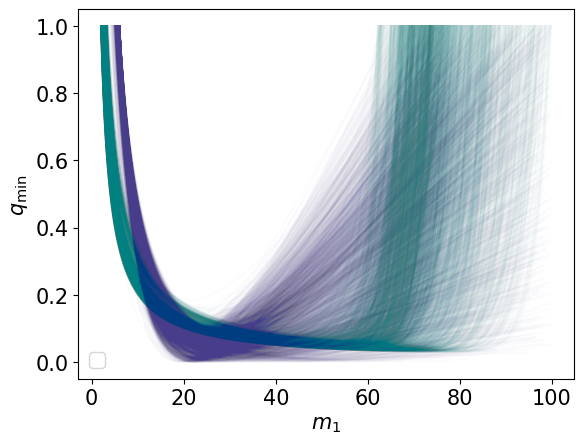

In [61]:
for i in range(2422):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
#plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.)/mass1_prior, color='darkslateblue',\
#         ls='dashed', linewidth=2., label='Parabola prior')
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')
plt.legend()
plt.xlabel(r'$m_1$')
plt.ylabel(r'$q_{\rm min}$')

Text(0.5, 0, '$q_{\\rm min}$ at $m_1=20M_{\\odot}$')

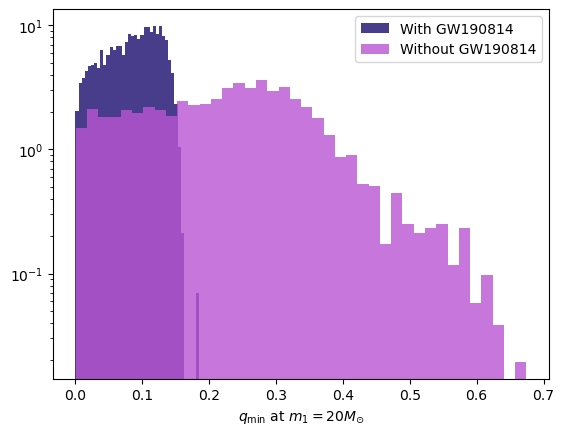

In [83]:
plt.hist(np.array(m2min_parabola_m1_20).flatten()/20., bins=40, color='darkslateblue',\
         label='With GW190814', density=True)
plt.hist(np.array(m2min_parabola_no190814_m1_20).flatten()/20., bins=40, color='mediumorchid',\
         label='Without GW190814', density=True, alpha=0.8)
plt.legend()
plt.yscale('log')
plt.xlabel(r'$q_{\rm min}$ at $m_1=20M_{\odot}$')

/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/corner/core.py:795: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X2, Y2, H2.T, V, **contour_kwargs)


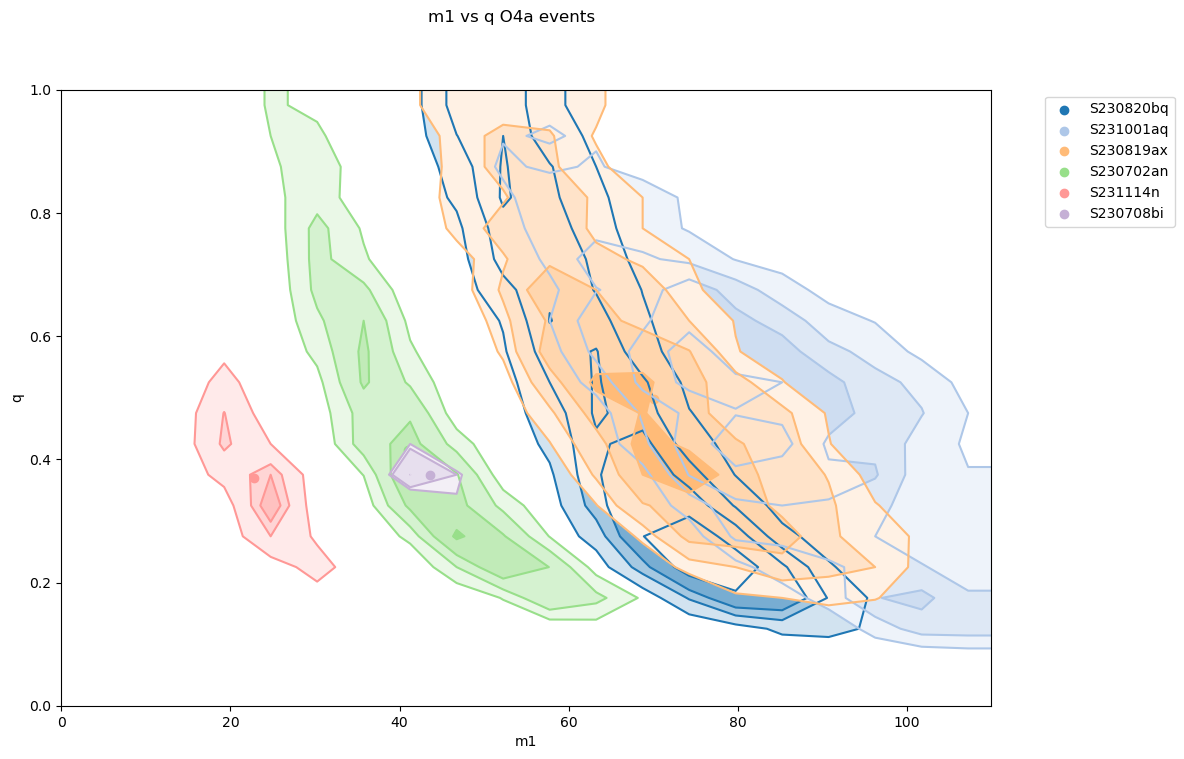

In [77]:
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 12))
i=0
plt.rcParams["figure.figsize"] = (12,8)

#plot events
for filename in glob.glob("m1_q_event_samples/S*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    eventname = (os.path.basename(filename)).split('.')[0]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q), fill_contours=True, plot_density=False,\
                  range=[(0,110), (0,1)], plot_datapoints=False, color=colors[i], contour_kwargs={'label':f'{eventname}'})
        plt.scatter(np.median(mass1),np.median(q), color=colors[i], label=f'{eventname}')
        i+=1

"""
#plot variable qmin model samps
for i in np.random.choice(14732,3000):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.)/mass1_prior, color='darkslateblue',\
         ls='dashed', linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')
"""

plt.xlabel('m1')
plt.ylabel('q')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('m1 vs q O4a events')
plt.savefig('m1_vs_q_O4a_events_nomodels.pdf', bbox_inches='tight')

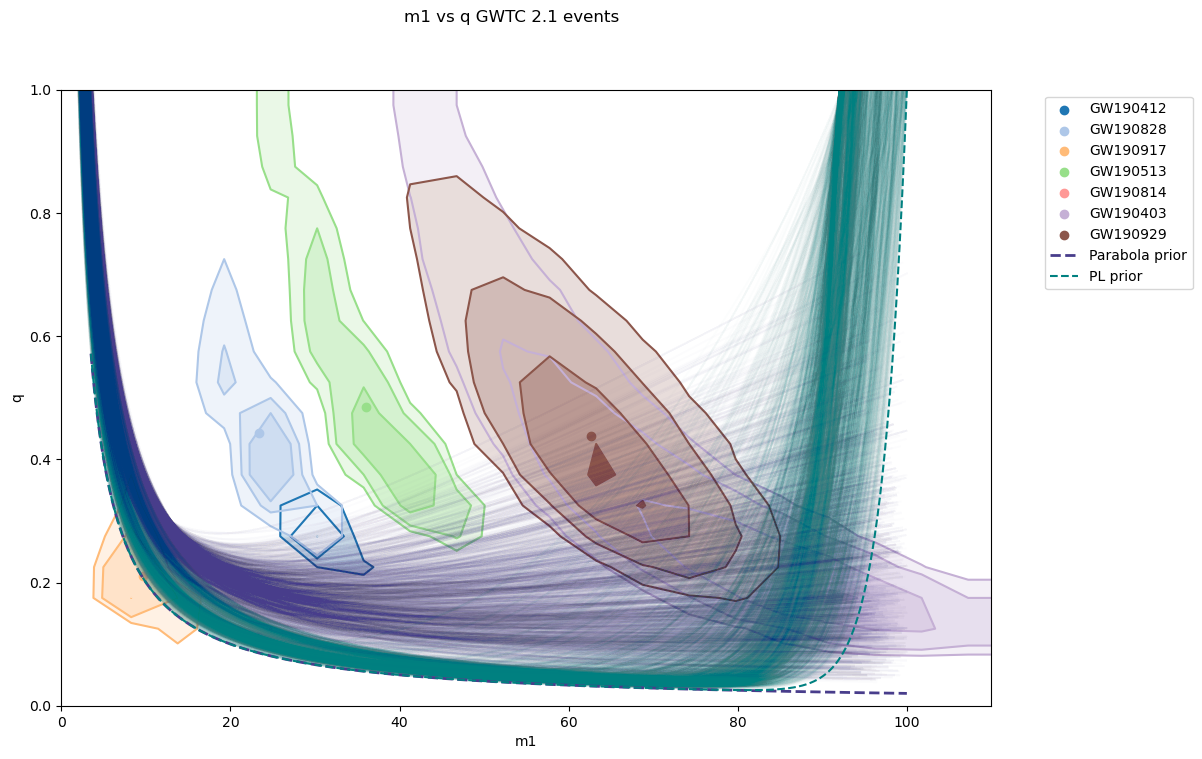

In [79]:
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 12))
i=0

for filename in glob.glob("m1_q_event_samples/IGWN-GWTC2p1*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q), fill_contours=True, plot_density=False,\
                  range=[(0,110), (0,1)], plot_datapoints=False, color=colors[i])
        plt.scatter(np.median(mass1),np.median(q), color=colors[i], label=f'{eventname}')
        i+=1
        
#plot variable qmin model samps
for i in np.random.choice(14732,3000):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.)/mass1_prior, color='darkslateblue',\
         ls='dashed', linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')


plt.xlabel('m1')
plt.ylabel('q')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('m1 vs q GWTC 2.1 events')
plt.savefig('m1_vs_q_GWTC21_events_models.pdf', bbox_inches='tight')

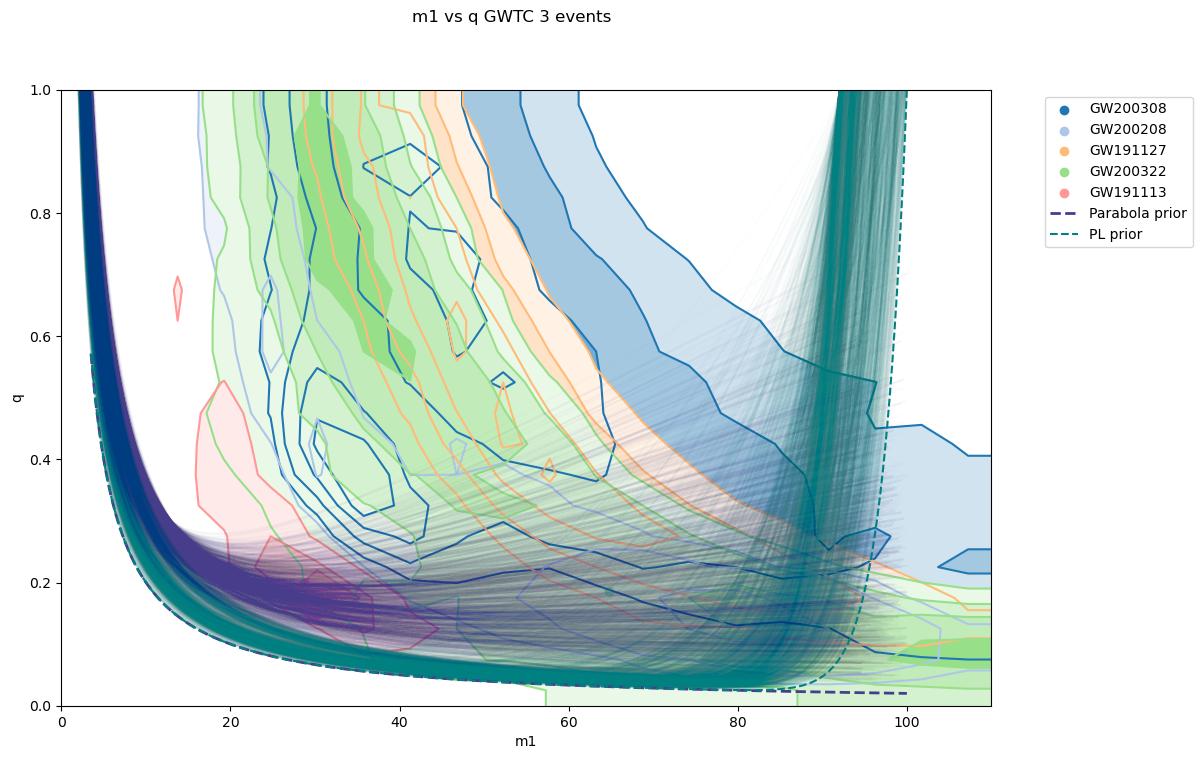

In [80]:
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 12))
i=0
plt.rcParams["figure.figsize"] = (12,8)


for filename in glob.glob("m1_q_event_samples/IGWN-GWTC3*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q), fill_contours=True, plot_density=False,\
                  range=[(0,110), (0,1)], plot_datapoints=False, color=colors[i])
        plt.scatter(np.median(mass1),np.median(q), color=colors[i], label=f'{eventname}')
        i+=1

#plot variable qmin model samps
for i in np.random.choice(14732,3000):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.)/mass1_prior, color='darkslateblue',\
         ls='dashed', linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')

plt.xlabel('m1')
plt.ylabel('q')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('m1 vs q GWTC 3 events')
plt.savefig('m1_vs_q_GWTC_3_events_models.pdf', bbox_inches='tight')